# Graph Coloring with k colors 
- it is an assignment of labels traditionally called "colors" to elements of a graph subject to certain constraints
- (vertex coloring) it is a way of coloring the vertices of a graph such that no two adjacent vertices are of the same color

>given a set of points/vertices and a list of connections/edges between them, assign one of k colours to each vertex so that no two vertices connected by an edge share the same colour

>For this problem there is no natural ordering; that is, ‘red’ is no more like ‘yellow’ than
‘blue’, as long as they are different.

>Therefore, we could assign the colours to the k integers representing them in any order
and still get valid equivalent solutions.

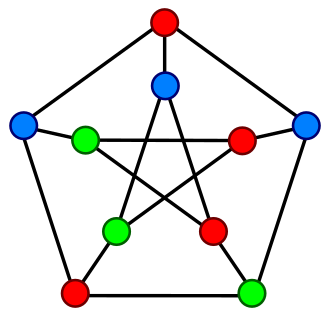

>Given an undirected graph G = (V, E), find a coloring of the vertices V such that no two adjacent vertices share the same color, and the number of colors used (k) is minimized.

1. Each vertex must be assigned a color.
2. No two adjacent vertices can have the same color. (Vertices connected by an edge are considered adjacent.)
3. The number of colors used should be minimized (k).

In [722]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
# we will need this for colors 
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm



# How to represent a graph 🤔?

>Adjacency Matrix: In this representation, a matrix is used where rows and columns represent vertices, and the presence of an edge between two vertices is indicated by a 1 or a weight if the graph is weighted, and 0 otherwise.
```python 
adj_matrix = [
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
]
```

>Adjacency List: In this representation, for each vertex in the graph, a list of adjacent vertices is maintained. 
```python 
adj_list = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1, 3],
    3: [2]
}
```

>Edge List: In this representation, all the edges of the graph are stored in a list or array. Each edge is represented as a tuple or an object containing the vertices it connects and optionally a weight.
```python 
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H')]
```

- other representations of graph as a datastructure exist but we will focus on these representations and select one of them 

## Edge List 

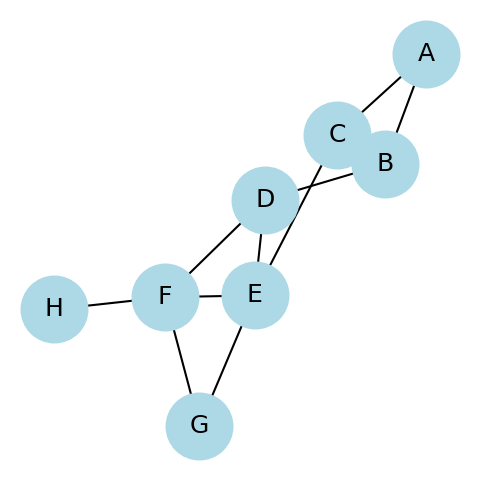

In [723]:
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H')]

G2 = nx.from_edgelist(edges)
# Visualize the graph
plt.figure(figsize=(3, 3), dpi=150)
nx.draw(G2, with_labels=True, node_color='lightblue', node_size=1000)
plt.show()

## Adjacecy list 

Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H'), ('G', 'H')]


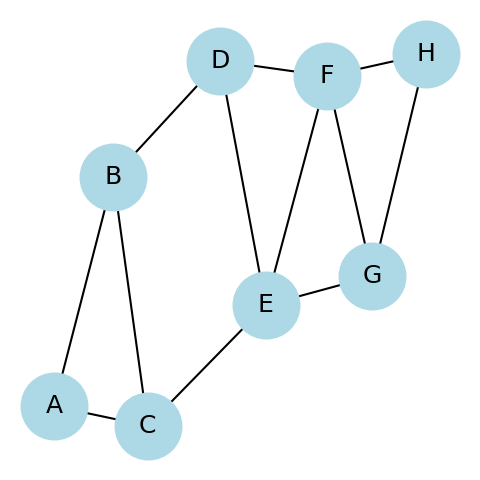

In [724]:
# Example adjacency list
adj_list = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'E'],
    'D': ['B', 'E', 'F'],
    'E': ['C', 'D', 'F', 'G'],
    'F': ['D', 'E', 'G', 'H'],
    'G': ['E', 'F', 'H'],
    'H': ['F', 'G']
}

# Create the graph
graph = nx.from_dict_of_lists(adj_list)
# Print the nodes and edges of the graph
print("Nodes:", graph.nodes())
print("Edges:", graph.edges())
# Visualize the graph
plt.figure(figsize=(3, 3), dpi=150)
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=1000)
plt.show()


## How to color the graph  🎨?

In [725]:
# Example adjacency list
class Node:
    def __init__(self, name, color) -> None:
        self.name = name
        self.color = color
    # I did this so the graph don't show the address of the object in the memory 
    def __str__(self) -> str:
        return self.name

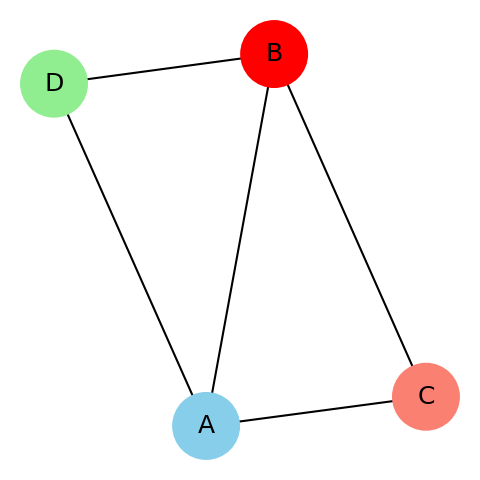

In [726]:
B = Node("B", "red")
A = Node("A", "skyblue")
C = Node("C", "Salmon")
D = Node("D", "lightgreen")
adj_list = {
    A : [B, C, D],
    B : [A, C, D],
    C : [B, A], 
    D : [A, B]

}

# Create the graph
graph = nx.from_dict_of_lists(adj_list)

# Set node colors as node attributes
for node in graph.nodes():
    graph.nodes[node]["color"] = node.color

# Draw the graph with node colors
plt.figure(figsize=(3, 3), dpi=150)
nx.draw(graph, with_labels=True, node_color=nx.get_node_attributes(graph, "color").values(), node_size=1000)
plt.show()


In [727]:
# this line would get us the attributes we set  (e.g. here the color)
nx.get_node_attributes(graph, "color").values()

dict_values(['skyblue', 'red', 'Salmon', 'lightgreen'])

In [728]:
for node in graph.nodes():
    print(graph.nodes[node]["color"])

skyblue
red
Salmon
lightgreen


# Designing the Evolutionary Algorithm 

### COLORS

In [729]:
# List all colors in XKCD Colors
xkcd_colors = mcolors.XKCD_COLORS
# let's see a sample of the 1000 colors in this list 
random.sample(sorted(xkcd_colors), 15)
# random.sample(sorted(xkcd_colors.values()), 15)

['xkcd:purple/blue',
 'xkcd:light bright green',
 'xkcd:pale purple',
 'xkcd:green grey',
 'xkcd:bright lime',
 'xkcd:magenta',
 'xkcd:purple/pink',
 'xkcd:grey brown',
 'xkcd:raspberry',
 'xkcd:shit',
 'xkcd:lightgreen',
 'xkcd:orangish brown',
 'xkcd:cinnamon',
 'xkcd:greeny blue',
 'xkcd:mint green']

In [730]:
# to get the hexa
xkcd_colors["xkcd:dark magenta"]

'#960056'

## Initalize the population 

- looping over the graph nodes and assign each a random color sampled from the xkcd colors
- note that selecting from 1000 color will mostly meaning that most of the nodes will have initaliy distinct colors
- maybe we should use the same color more than once maybe... 
-  so we should reward the one having the less colors to minimize k 

In [731]:
random.sample(sorted(xkcd_colors), 1)[0]

'xkcd:greeny grey'

In [732]:
# create some Nodes
# Node(name, colo)
nodes = [Node([chr(ord("A")+i) for i in range(8)][j], random.sample(sorted(xkcd_colors), 1)[0]) for j in range(8)]
A, B, C, D, E, F, G, H = nodes

In [733]:
for node in nodes:
    print(node.__getstate__())

{'name': 'A', 'color': 'xkcd:bland'}
{'name': 'B', 'color': 'xkcd:sage green'}
{'name': 'C', 'color': 'xkcd:cool green'}
{'name': 'D', 'color': 'xkcd:yellow'}
{'name': 'E', 'color': 'xkcd:flat blue'}
{'name': 'F', 'color': 'xkcd:mustard brown'}
{'name': 'G', 'color': 'xkcd:vermillion'}
{'name': 'H', 'color': 'xkcd:periwinkle blue'}


In [734]:
adj_list = {
    A: [B, C],
    B: [A, C, D],
    C: [A, B, E],
    D: [B, E, F],
    E: [C, D, F, G],
    F: [D, E, G, H],
    G: [E, F, H],
    H: [F, G]
}

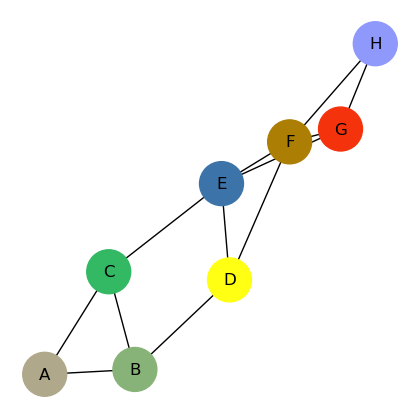

In [735]:
def plot_Graph(adj_list, turnoffplot=False):
    # Create the graph
    graph = nx.from_dict_of_lists(adj_list)

    # Set node colors as node attributes
    for node in graph.nodes():
        graph.nodes[node]["color"] = node.color
        
        
    fig = None
    # if the plotting is not turned off 
    # we may turn it off when we need the graph object
    # like when used with subplots
    if not turnoffplot:
        # Draw the graph with node colors
        fig = plt.figure(figsize=(4, 4))
        nx.draw(graph, with_labels=True, node_color=nx.get_node_attributes(graph, "color").values(), node_size=1000)
    # plt.show()
    return graph, fig

graphX, fig = plot_Graph(adj_list)


> we may use this inital set of colors as a pool of color selection instead of all the 1000 color in the worst case k can be equal to the number of vertices as every vertex would have a unique color 

### Out Genes for the problem 🧬🧬

In [736]:
colors = list(nx.get_node_attributes(graphX, "color").values())
colors_genes = {i : colors[i] for i in range(len(colors))}
colors_genes

{0: 'xkcd:bland',
 1: 'xkcd:sage green',
 2: 'xkcd:cool green',
 3: 'xkcd:yellow',
 4: 'xkcd:flat blue',
 5: 'xkcd:mustard brown',
 6: 'xkcd:vermillion',
 7: 'xkcd:periwinkle blue'}

In [737]:
# create some Nodes
# Node(name, colo)
def create_nodes(numOfNodes=8, colors=None):
    nodes = [Node( [chr(ord("A")+i) for i in range(numOfNodes)][j], random.sample(sorted(xkcd_colors), 1)[0]) for j in range(numOfNodes) ]
    if colors is None:
        return nodes
    else:
         for i, node in enumerate(nodes):
             node.color = colors_genes[colors[i]]  
    return nodes


A, B, C, D, E, F, G, H = nodes = create_nodes(colors=[7, 3, 1, 7, 1, 0, 0, 1])


In [738]:
for node in nodes:
    print(f"{node.name} , {node.color}")

A , xkcd:periwinkle blue
B , xkcd:yellow
C , xkcd:sage green
D , xkcd:periwinkle blue
E , xkcd:sage green
F , xkcd:bland
G , xkcd:bland
H , xkcd:sage green


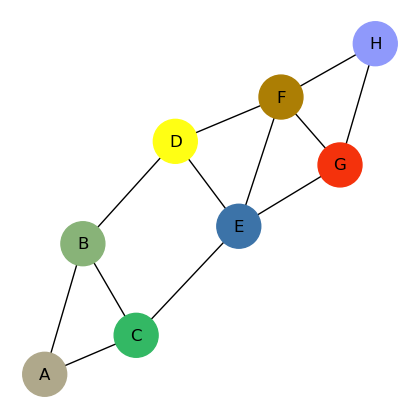

In [739]:
plot_Graph(adj_list);

In [740]:
def initalize_population(pop_size):
    return [[random.sample(sorted(colors_genes), 1)[0] for _ in range(len(colors_genes))] for i in range(pop_size)]

In [741]:
init_pop = initalize_population(10)
init_pop

[[0, 6, 4, 4, 7, 4, 2, 1],
 [2, 3, 0, 4, 0, 7, 7, 7],
 [0, 7, 3, 3, 7, 7, 6, 7],
 [1, 0, 3, 4, 3, 0, 2, 2],
 [0, 5, 0, 2, 0, 4, 5, 1],
 [0, 1, 6, 2, 2, 4, 2, 7],
 [5, 0, 1, 4, 5, 5, 6, 1],
 [6, 1, 4, 7, 2, 1, 4, 5],
 [6, 3, 3, 0, 1, 1, 7, 4],
 [6, 5, 4, 5, 2, 7, 7, 7]]

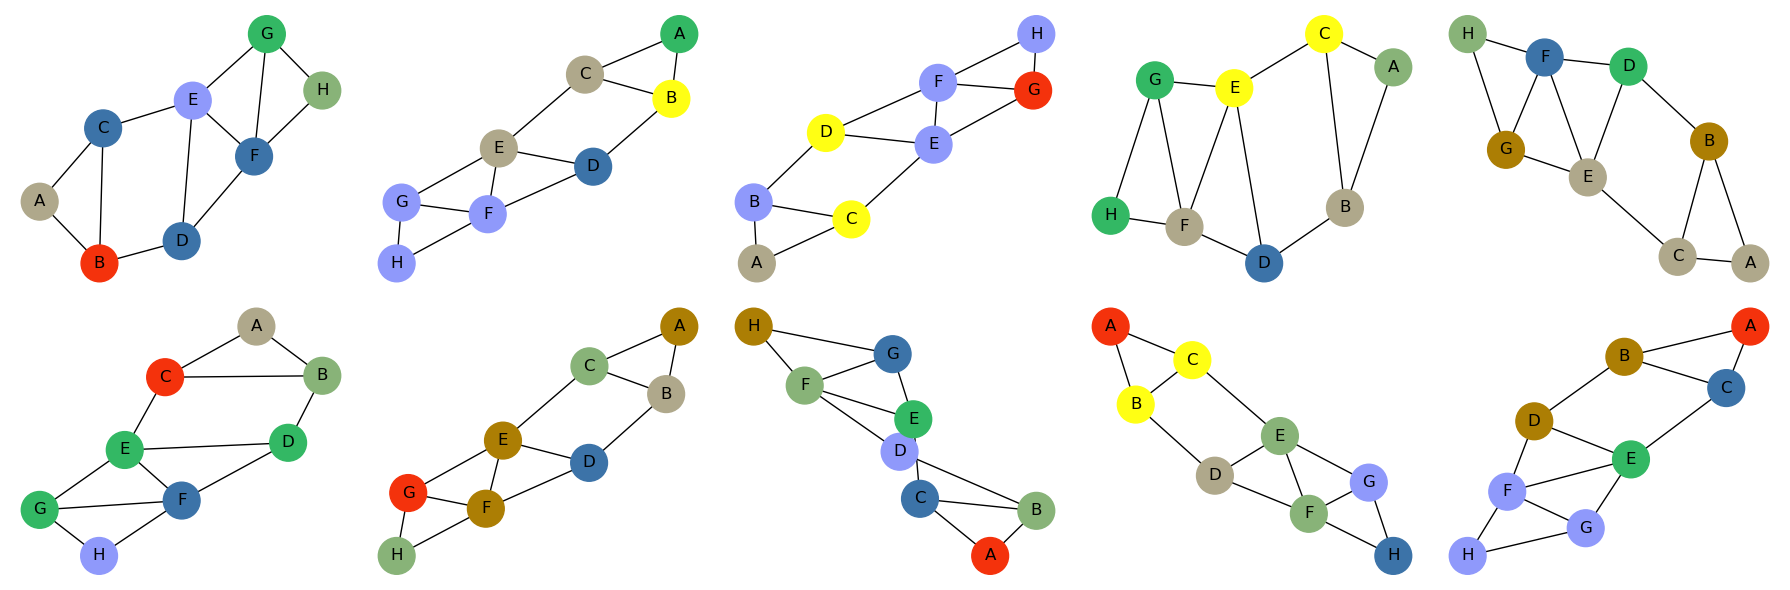

In [742]:
# Create a new figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 6))
# Flatten the axes array
axes_flat = axes.flatten()

for i, p in enumerate(init_pop):
    A, B, C, D, E, F, G, H = create_nodes(colors=p)
    adj_list = {
    A: [B, C],
    B: [A, C, D],
    C: [A, B, E],
    D: [B, E, F],
    E: [C, D, F, G],
    F: [D, E, G, H],
    G: [E, F, H],
    H: [F, G]
    }



    graph = plot_Graph(adj_list, turnoffplot=True)[0] #graph
    nx.draw(graph, with_labels=True, node_color=nx.get_node_attributes(graph, "color").values(), node_size=700, ax=axes_flat[i])

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


In [743]:
init_pop

[[0, 6, 4, 4, 7, 4, 2, 1],
 [2, 3, 0, 4, 0, 7, 7, 7],
 [0, 7, 3, 3, 7, 7, 6, 7],
 [1, 0, 3, 4, 3, 0, 2, 2],
 [0, 5, 0, 2, 0, 4, 5, 1],
 [0, 1, 6, 2, 2, 4, 2, 7],
 [5, 0, 1, 4, 5, 5, 6, 1],
 [6, 1, 4, 7, 2, 1, 4, 5],
 [6, 3, 3, 0, 1, 1, 7, 4],
 [6, 5, 4, 5, 2, 7, 7, 7]]

In [745]:
list(colors_genes.values())

['xkcd:bland',
 'xkcd:sage green',
 'xkcd:cool green',
 'xkcd:yellow',
 'xkcd:flat blue',
 'xkcd:mustard brown',
 'xkcd:vermillion',
 'xkcd:periwinkle blue']

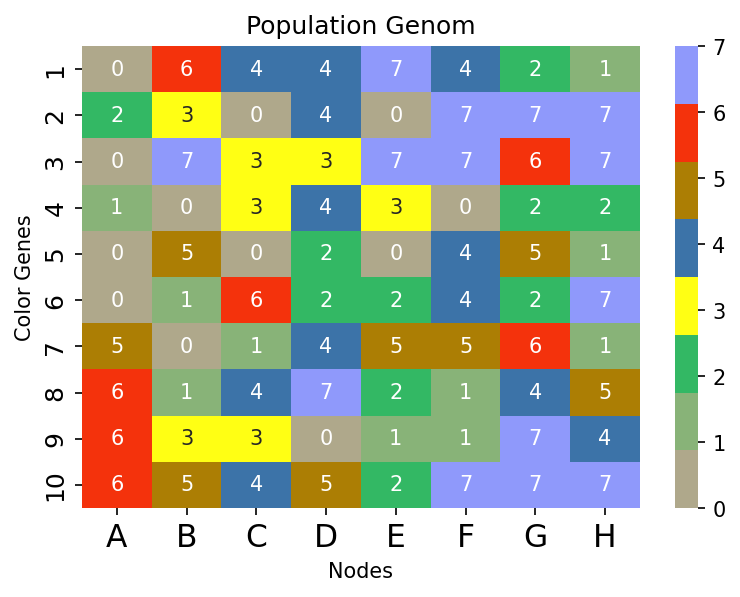

In [822]:
# Creating a custom colormap for the heatmap
# Define a colormap and normalization instance
cmap = ListedColormap(list(colors_genes.values()))
# This array defines the boundaries for the colormap normalization
# Each number represents the boundary between consecutive colors in the colormap
# bounds = np.arange(0, len(colors_genes))  
# norm = BoundaryNorm(bounds, cmap.N)

# Plot heatmap with custom colors
plt.figure(figsize=(6, 4), dpi=150)
sns.heatmap(init_pop, cmap=cmap, annot=True)
plt.xlabel("Nodes")
plt.ylabel("Color Genes")
# (location, labels)
plt.xticks(np.arange(0.5, 8.5), [chr(ord("A") + i) for i in range(8)], size=15)
plt.yticks(np.arange(0.5, len(init_pop) + 0.5), np.arange(1, len(init_pop) + 1), size=12)
plt.title("Population Genom")

plt.show()
